In [ ]:
#Declare packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import warnings

# Tắt cảnh báo
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [ ]:
#path = os.getcwd()
#print(str(path).replace("\/", "/"))
#os.chdir(path)

In [ ]:
#df = pd.read_csv('C:/Users/HP/Pictures/HR/HR-Analytics/data/raw/HR-Employee-Attrition.csv')
#df = pd.read_csv("C:/Users/HP/Pictures/g/data/processed/train_data_attrition.csv")
df=pd.read_csv("/content/train_data_attrition.csv")
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,...,80,3,2,3,3,1,1,0,0,No
1,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,...,80,0,0,2,3,0,0,0,0,No
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,...,80,1,10,2,3,3,2,0,2,No
3,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,...,80,0,7,3,3,5,4,1,0,No
4,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,...,80,1,10,2,3,10,8,0,2,No


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
columns_df = df.columns

# Exploration Data Analysis

# Xem xét quy mô công ty

In [ ]:
fig=make_subplots(rows=1, cols=2,
                  subplot_titles=("", "Số lượng nhân viên nghỉ việc theo phòng ban"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=df['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Cựu nhân viên' if i == 'Yes' else 'Nhân viên hiện tại' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#1F0202'), marker_color=["#C41823","#368EED"])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=df[df.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=["#A70C09","#E74824","#D08841"]), row=1, col=2)
                    #  marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=1, col=2)
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Thống kê về tình trạng làm việc tại công ty", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

- Dựa vào biểu đồ ta thấy trong bộ dữ liệu bao gồm 16.1% nhân viên đã nghỉ việc và có 83.9% nhân viên vẫn còn đang làm
- Trong đó
    + Ở phòng ban R&D, số lượng nhân viên nghỉ việc chiếm tỷ lệ cao nhất, khoảng 51.3%
    + Ngay sau đó là phòng ban Sales, chiếm khoảng 38.8% tỷ lệ nhân viên nghỉ việc
    + Phòng ban HR chiếm tỷ lệ ít nhất, với 5.06%

# Đầu tiên ta sẽ tìm hiểu về thông tin cá nhân của từng nhân viên

In [ ]:
age_att=df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.line(age_att,x='Age',y='Counts',color='Attrition',width=1000,labels={"Age":"Tuổi","Counts":"Số lượng", "Attrition":"Tình trạng nghỉ việc"},title='Số lượng nhân viên trong công ty theo độ tuổi ')
fig.for_each_trace(lambda trace: trace.update(name='Đang làm việc') if trace.name == 'No' else trace.update(name='Nghỉ việc'))
fig.show()

<ipython-input-307-1656315342>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



- Ta có thể thấy ở độ tuổi 26 đến 38 số lượng nhân viên nghỉ việc tăng cao. Điều này là vì đây là độ tuổi bắt đầu tìm kiếm việc làm nên họ thường có xu hướng muốn khám phá và tìm kiếm nhiều cơ hội mới, và họ yêu cầu trải nghiệm trong công việc nhiều hơn.
- Còn từ độ tuổi 40 trở về sau số lượng nhân viên nghỉ việc càng giảm. Bởi vì đây là độ tuổi mà họ cần có sự ổn định trong công việc để lo cho cuộc sống và đây cũng là độ tuổi có rủi ro tìm việc cao nhất

In [ ]:
plot_df = df.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color="#3497DE")
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Lương trung bình theo vai trò trong công ty', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Nhận xét: Ta thấy những người giữ chức vụ quan trọng trong công ty sẽ có những mức đãi ngộ trung bình cao hơn (đối với vị trí Manager là >200k, Reseach Director là >190k), ngoài ra những vị trí khác cũng có mức lương tương đối cao (Healthcare Representative viws ~90k, Manufacturing Director với ~87k, Sales Executive với ~ 83k)

In [ ]:
df['Các nhóm khoảng cách từ nhà đến công ty'] = df['DistanceFromHome'].apply(lambda x: int(x / 5))

fig_bar = px.histogram(
    df,
    x='Các nhóm khoảng cách từ nhà đến công ty',
    color=df['Attrition'].map(lambda x: 'Đang làm việc' if x == 'No' else 'Nghỉ việc'),
    barmode='group',
    color_discrete_map={'Nghỉ việc': '#DE1515', 'Đang làm việc': '#3497DE'},
    text_auto=True
)
fig_bar.update_layout(
    title='Khoảng cách từ nhà đến công ty',
    legend_title_text='Tình trạng làm việc',
    xaxis_title='Nhóm khoảng cách (km)',
    yaxis_title='Số lượng'
)

fig_bar.update_traces(textposition='outside',marker=dict(line=dict(color='black', width=1)))
fig_bar.show()

fig_pie = make_subplots(
    rows=2,
    cols=3,
    specs=[[{'type': 'domain'}] * 3] * 2,
    subplot_titles=[
        "Nhóm 0: Khoảng cách 0 - 4 km",
        "Nhóm 1: Khoảng cách 5 - 9 km",
        "Nhóm 2: Khoảng cách 10 - 14 km",
        "Nhóm 3: Khoảng cách 15 - 19 km",
        "Nhóm 4: Khoảng cách 20 - 24 km",
        "Nhóm 5: Khoảng cách 25 - 29 km"
    ]
)
color_map = {'Đang làm việc': '#3497DE', 'Nghỉ việc': '#DE1515'}
for i in range(2):
    for j in range(3):
        group_index = j if i == 0 else j + 3
        vc = df[df['Các nhóm khoảng cách từ nhà đến công ty'] == group_index]['Attrition'].value_counts().reindex(['No', 'Yes'], fill_value=0)
        values = vc.values
        labels = ['Đang làm việc' if label == 'No' else 'Nghỉ việc' for label in vc.index]
        colors = [color_map[label] for label in labels]
        fig_pie.add_trace(
            go.Pie(
                labels=labels,
                values=values,
                name=f'Nhóm {group_index}',textposition='inside',
                pull=[0.05, 0],
                marker=dict(colors=colors, line=dict(color='black', width=1)),
                sort=False,
                textinfo='percent+label'
            ),
            row=i+1,
            col=j+1
        )
fig_pie.update_traces(
    textfont_size=14,
    pull=[0.1, 0],
    selector=dict(type='pie')
)
fig_pie.update_layout(
    title_text='Tỉ lệ nghỉ việc theo từng nhóm khoảng cách từ nhà đến công ty',
    height=800,
    showlegend=True,
    legend_title_text='Tình trạng làm việc'
)
fig_pie.show()

- Ở 2 biểu đồ này ta có thể thấy:
  + Nhóm 0 (0-4 km): 85.1% đang làm việc, 14.9% nghỉ việc.
  + Nhóm 1 (5-9 km): 84.2% đang làm việc, 15.8% nghỉ việc.
  + Nhóm 2 (10-14 km): 84% đang làm việc, 16% nghỉ việc.
  + Nhóm 3 (15-19 km): 78.8% đang làm việc, 21.2% nghỉ việc.
  + Nhóm 4 (20-24 km): 72.8% đang làm việc, 27.2% nghỉ việc
  + Nhóm 5 (25-29 km): 84% đang làm việc, 16% nghỉ việc.
  + Nhóm 0 (0-4 km) có số lượng nhân viên đông nhất (388 người đang làm việc, 68 người nghỉ việc), cho thấy nhiều người sống gần công ty.
  + Số lượng nhân viên giảm dần khi khoảng cách tăng: nhóm 1 (5-9 km) có 245 người đang làm việc và 46 người nghỉ việc, nhóm 2 (10-14 km) có 121 người đang làm việc và 23 người nghỉ việc, và tiếp tục giảm ở các nhóm xa hơn.
  + Tỷ lệ nghỉ việc dường như không tăng rõ rệt theo khoảng cách

=> Khoảng cách từ nhà đến công ty có ảnh hưởng đến tỷ lệ nghỉ việc: nhân viên sống xa (đặc biệt 20-24 km) có xu hướng nghỉ việc cao hơn. Tuy nhiên, mối quan hệ này không hoàn toàn đáng lo, vì nhóm xa nhất (25-29 km) lại có tỷ lệ nghỉ việc thấp hơn nhóm 20-24 km. Số lượng nhân viên giảm khi khoảng cách tăng, cho thấy đa số nhân viên có xu hướng sống gần công ty.

In [ ]:
df['Tổng số năm làm việc '] = [int(i/5) for i in df['TotalWorkingYears']]
fig = px.histogram(
    df,
    x='Tổng số năm làm việc ',
    color=df['Attrition'].map({'No': 'Đang làm việc', 'Yes': 'Nghỉ việc'}),
    barmode='group',
    color_discrete_map={'Đang làm việc': '#3497DE', 'Nghỉ việc':'#DE1515' },
    text_auto=True
)
fig.update_traces(textposition='outside',marker=dict(line=dict(color='black', width=1)))
fig.update_layout(
    title='Tổng số năm làm việc của nhân viên',
    legend_title_text='Tình trạng nghỉ việc',
    xaxis_title='Tổng số năm làm việc ',
    yaxis_title='Số lượng',
)
fig.show()

- Phân bố số năm làm việc:
  + Số lượng nhân viên đông nhất ở khoảng từ nhóm 0 đến nhóm 4, cho thấy phần lớn nhân viên có thâm niên dưới 5 năm.
  + Số lượng nhân viên giảm dần khi số năm làm việc tăng.
  + Từ nhóm 5 trở lên có rất ít nhân viên, với số lượng dao động từ 2 đến 40 người, cho thấy ít nhân viên ở lại công ty lâu dài.
- Tỷ lệ nghỉ việc:
  + Tỷ lệ nghỉ việc dường như cao hơn ở các nhóm có thâm niên thấp (Điều này là vì đây là năm đầu tiên họ làm việc nên họ có thể nghỉ việc tại công ty nếu cảm thấy bản thân không phù hợp với công ty)
  + Ở các nhóm thâm niên cao hơn, số lượng nghỉ việc rất thấp (Có thể là do họ đã gắn bó với công ty lâu dài và cảm thấy bản thân phù hợp với công ty)

In [ ]:
fig = px.histogram(
    df,
    x='NumCompaniesWorked',
    color=df['Attrition'].map({'No': 'Đang làm việc', 'Yes': 'Nghỉ việc'}),
    barmode='group',
    color_discrete_map={
        'Nghỉ việc': '#DE1515',
        'Đang làm việc': '#3497DE'
    },
    text_auto=True
)
fig.update_traces(textposition='outside',marker=dict(line=dict(color='black', width=1)))
fig.update_layout(
    title='Tổng số công ty đã làm của nhân viên',
    legend_title_text='Tình trạng nghỉ việc',
    xaxis_title='Tổng số công ty đã làm',
    yaxis_title='Số lượng',
)
fig.show()

- Phần lớn nhân viên trong công ty chỉ làm việc cho 1 công ty
- Số lượng nhân viên nghỉ việc tập trung nhiều ở nhóm 1 (điều này có thể là vì họ muốn tìm kiếm thêm kinh nghiệm trong công việc ở những năm đầu làm việc)
- Nhân viên làm cho càng nhièu công ty thì tỉ lệ họ nghỉ việc càng thấp (Có thể là vì họ đã có đủ kinh nghiệm làm việc mà họ cần)

In [ ]:
df['Attrition_Label'] = df['Attrition'].map({'No': 'Đang làm việc', 'Yes': 'Nghỉ việc'})
fig = make_subplots(rows=1, cols=2, subplot_titles=["Giới tính", "Tình trạng hôn nhân"])

gender_counts = df.groupby(['Gender', 'Attrition_Label']).size().reset_index(name='Count')
for attr in gender_counts['Attrition_Label'].unique():
    data = gender_counts[gender_counts['Attrition_Label'] == attr]
    fig.add_trace(
        go.Bar(
            x=data['Gender'].map({'Female': 'Nữ', 'Male': 'Nam'}),
            y=data['Count'],
            name=attr,
            marker=dict(line=dict(color='black', width=1),color=color_map[attr]),
            text=data['Count'],
            textposition='outside',
        ),
        row=1, col=1
    )

marital_counts = df.groupby(['MaritalStatus', 'Attrition_Label']).size().reset_index(name='Count')
for attr in marital_counts['Attrition_Label'].unique():
    data = marital_counts[marital_counts['Attrition_Label'] == attr]
    fig.add_trace(
        go.Bar(
            x=data['MaritalStatus'].map({'Divorced': 'Ly hôn', 'Married': 'Kết hôn', 'Single': 'Độc thân'}),
            y=data['Count'],
            name=attr,
            marker=dict(line=dict(color='black', width=1),color=color_map[attr]),
            text=data['Count'],
            textposition='outside',
            showlegend=False ,
        ),
        row=1, col=2
    )
fig.update_layout(
    title='Số lượng nhân viên nghỉ việc theo giới tính và tình trạng hôn nhân',
    barmode='group',
    legend_title_text='Tình trạng nghỉ việc',
    height=500,
    width=1000
)
fig.show()

- Ta có thể thấy rằng số lượng nhân viên nam nghỉ việc cao hơn nhân viên
- Số lượng nhân viên độc thân nghỉ việc cao nhất (102 người) tiếp đến là nhân viên đã kết hôn (70 người) cuối cùng là nhân viên đã ly hôn ( 26 người)


In [ ]:
education_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
colors = {'No': '#3497DE', 'Yes': '#DE1515'}
edu_counts = df.groupby(['Education', 'Attrition']).size().reset_index(name='Count')
fig_bar = go.Figure()
for attr in ['No', 'Yes']:
    data = edu_counts[edu_counts['Attrition'] == attr]
    fig_bar.add_trace(
        go.Bar(
            x=[education_labels[i-1] for i in data['Education']],
            y=data['Count'],
            name='Đang làm việc' if attr == 'No' else 'Nghỉ việc',
            marker=dict(color=colors[attr], line=dict(color='black', width=1)),
            text=data['Count'],
            textposition='outside'
        )
    )
fig_bar.update_layout(
    title='Trình độ học vấn của nhân viên',
    barmode='group',
    width=1000,
    height=500
)
fig_bar.show()


In [ ]:
fig_pie = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'domain'}]*3, [{'type': 'domain'}]*3],
    subplot_titles=[f'{label}' for label in education_labels]
)
for i in range(1, 6):
    row = 1 if i <= 3 else 2
    col = i if i <= 3 else i - 3

    data = df[df['Education'] == i]['Attrition'].value_counts()
    values = [data.get('No', 0), data.get('Yes', 0)]
    total = sum(values)
    percents = [v / total * 100 if total > 0 else 0 for v in values]

    fig_pie.add_trace(
        go.Pie(
            labels=['Đang làm việc', 'Nghỉ việc'],
            values=percents,
            marker=dict(colors=[colors['No'], colors['Yes']], line=dict(color='black', width=1)),
            textinfo='percent+label',textposition='inside',
            pull=[0.05, 0],

        ),
        row=row, col=col
    )

fig_pie.update_layout(
    title='Tỷ lệ nghỉ việc theo trình độ học vấn',
    height=700, width=1000
)
fig_pie.show()


- Qua 2 biểu đồ trên ta có thể thấy:
  + Trình độ "Bachelor" có số lượng nhân viên đông nhất cho thấy đây là nhóm phổ biến nhất trong công ty. Tiếp theo là "Master", "College" , "Below College" và "Doctor" là ít nhất.
  + Số lượng nhân viên nghỉ việc tỷ lệ thuận với số lượng nhân viên ở mỗi trình độ
  + Below College: 81.1% đang làm việc, 18.9% nghỉ việc.
  + College: 84.9% đang làm việc, 15.1% nghỉ việc.
  + Bachelor: 81.9% đang làm việc, 18.1% nghỉ việc.
  + Master: 83.6% đang làm việc, 16.4% nghỉ việc.
  + Doctor: 92.1% đang làm việc, 7.89% nghỉ việc.

=> Tỷ lệ nghỉ việc dao động từ 7.89% đến 18.9%, không có sự khác biệt lớn giữa các trình độ học vấn. Nhóm "Below College" có tỷ lệ nghỉ việc cao nhất (18.9%), trong khi "Doctor" có tỷ lệ thấp nhất (7.89%).

# Tiếp theo ta sẽ phân tích kỹ hơn đối với nhóm Thông tin Công việc của Nhân viên

In [ ]:

colors = {'Yes': '#F30909', 'No': '#2792DE'}

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

fig = make_subplots(rows=4, cols=2,
                     subplot_titles=['EducationField', 'Department', 'JobRole', 'OverTime','JobLevel', 'JobInvolvement', 'JobSatisfaction'],
                     vertical_spacing=0.15, horizontal_spacing=0.1)


variables = ['EducationField', 'Department', 'JobRole', 'OverTime','JobLevel', 'JobInvolvement', 'JobSatisfaction']
subplot_positions = [(1, 1), (1, 2), (2, 1), (2, 2),(3,1),(3,2),(4,1)]

for idx, var in enumerate(variables):
    row, col = subplot_positions[idx]

    counts = df.groupby([var, 'Attrition']).size().unstack(fill_value=0)

    categories = counts.index.tolist()
    for attrition in ['No', 'Yes']:
        fig.add_trace(
            go.Bar(
                x=categories,
                y=counts[attrition].values,
                name='Đang làm việc' if attrition == 'No' else 'Nghỉ việc',
                marker_color=colors[attrition],
                marker_line_color='black',
                marker_line_width=1,
                text=counts[attrition].values,
                showlegend=(idx == 0)
            ),
            row=row, col=col
        )

fig.update_layout(
    width=2000, height=1000,
    showlegend=True,
    title_text="Phân tích các yếu tố nghỉ việc liên quan đến Nhóm thông tin công việc của nhân viên",
    barmode='group',
    template='plotly_white'
)

for row in range(1, 5):
    for col in range(1, 3):
        fig.update_xaxes(title_text='', tickangle=30, row=row, col=col)
        fig.update_yaxes(title_text='Count', row=row, col=col)

fig.show()


- Nhận xét chung: Ta nhận thấy đa số những người còn làm việc luôn nhiều hơn những người đã nghỉ việc. Để làm rõ hơn tỉ lệ của nhân viên nghỉ việc chiếm bao nhiêu phần trăm trong từng đặc trưng, ta sẽ tiếp tục đi làm rõ

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f'{cat}' for cat in sorted(df['EducationField'].unique())],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    specs=[[{'type': 'domain'} for _ in range(3)] for _ in range(2)]
)


attrition_labels = sorted(df['Attrition'].unique())
colors = [colors[label] for label in attrition_labels]


display_labels = ['Đang làm việc' if label == 'No' else 'Nghỉ việc' for label in attrition_labels]


edu_fields = sorted(df['EducationField'].unique())

for idx, field in enumerate(edu_fields):

    row = (idx // 3) + 1
    col = (idx % 3) + 1
    field_data = df[df['EducationField'] == field]

    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_labels]


    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=row, col=col
    )


fig.update_layout(
    width=1800,
    height=600,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Lĩnh vực Giáo dục",
    template='plotly_white'
)


for row in range(1, 3):
    for col in range(1, 4):
        fig.update_xaxes(showticklabels=False, row=row, col=col)
        fig.update_yaxes(showticklabels=False, row=row, col=col)

fig.show()

- Nhận xét: 3 lĩnh vực Human Resources, Marketing và Technical Degree có tỉ lệ nhân viên nghỉ việc cao nhất trong tổng số 6 lĩnh vực giáo dục

In [ ]:
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f'{cat}' for cat in sorted(df['Department'].unique())[:3]],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    specs=[[{'type': 'domain'} for _ in range(3)]]
)


attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc' if val == 'No' else 'Nghỉ việc' for val in attrition_values]
colors = ['#66B2FF', '#F30909']


departments = sorted(df['Department'].unique())[:3]

for idx, dept in enumerate(departments):

    field_data = df[df['Department'] == dept]


    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]


    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )


fig.update_layout(
    width=1800,
    height=300,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Phòng ban",
    template='plotly_white'
)


for col in range(1, 4):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét: Trong 3 phòng ban:
    + Phòng Sales chiếm tỷ lệ nhân viên nghỉ việc cao nhất (~21.6%)
    + Tiếp đến là Phòng HR chiếm tỷ lệ ~ 20%
    + Phòng ban R&D chiếm tỷ lệ thấp nhất ~14.4%

In [ ]:
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[f' {cat}' for cat in sorted(df['JobRole'].unique())],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    specs=[[{'type': 'domain'} for _ in range(3)] for _ in range(3)]
)

attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc' if val == 'No' else 'Nghỉ việc' for val in attrition_values]
colors = ['#66B2FF', '#F30909']


job_roles = sorted(df['JobRole'].unique())

for idx, role in enumerate(job_roles):

    row = (idx // 3) + 1
    col = (idx % 3) + 1

    field_data = df[df['JobRole'] == role]


    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]

    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=row, col=col
    )


fig.update_layout(
    width=1800,
    height=600,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Vai trò công việc",
    template='plotly_white'
)

for row in range(1, 4):
    for col in range(1, 4):
        fig.update_xaxes(showticklabels=False, row=row, col=col)
        fig.update_yaxes(showticklabels=False, row=row, col=col)

fig.show()

- Nhận xét:
    - Trong JobRole, có 4 trong tổng số 9 công việc có tỷ lệ nghỉ việc thấp hơn 7% bao gồm: Healthcare, Manager, Research Director và Manufacturing Director, đây là những vị trí có vai trò quan trọng trong công ty và thông thường những nhân viên ở vị trí này có sự ổn định và có thâm niên trong công ty nên xu hướng nghỉ việc của họ thấp.
    - Các vai trò khác có tỷ lệ đều trên 15% trong dó ta có thể thấy ở vai trò Sales Executive và Sales Representative có tỉ lệ nghỉ việc khá cao (17.7% và 41.3%), điều này có thể giải thích vì sao ở Phòng ban này chiếm tỷ lệ nhân viên nghỉ việc cao nhất (đã chỉ ra ở trên)

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[f'OverTime: {cat}' for cat in sorted(df['OverTime'].unique())],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(2)]]
)


attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc' if val == 'No' else 'Nghỉ việc' for val in attrition_values]
colors = ['#66B2FF', '#F30909']


overtime_values = sorted(df['OverTime'].unique())

for idx, overtime in enumerate(overtime_values):

    field_data = df[df['OverTime'] == overtime]


    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]


    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )


fig.update_layout(
    width=800,
    height=400,
    title_text="Tỷ lệ nhân viên nghỉ việc theo OverTime",
    template='plotly_white'
)


for col in range(1, 3):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:
    - Ta nhận thấy đối với những nhân viên không làm thêm giờ tại công ty, xu hướng họ nghỉ việc ít hơn.
    - Đối với những người làm thêm giờ ở công ty, ta nhận thấy xu hướng họ nghỉ việc rất cao, chiếm 1/4 trong tổng số nhân viên có làm thêm giờ. Nguyên nhân có thể đến từ áp lực từ công việc làm thêm, hay giá trị nhận được khi thực hiện làm thêm tại công ty không tương xứng với mức thưởng.

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=[f'JobInvolvement: {["Low", "Medium", "High", "Very High"][i]}' for i in range(4)],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(4)]]
)


attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc' if val == 'No' else 'Nghỉ việc' for val in attrition_values]
colors = ['#66B2FF', '#F30909']


job_involvement_values = sorted(df['JobInvolvement'].unique())

for idx, involvement in enumerate(job_involvement_values):

    field_data = df[df['JobInvolvement'] == involvement]


    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]


    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )


fig.update_layout(
    width=1200,
    height=300,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Mức độ tham gia công việc",
    template='plotly_white'
)


for col in range(1, 5):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:
    - Dựa vào biểu đồ ta có thể rút ra được nhận xét khi nhân viên có mức độ tham gia vào công việc của công ty càng nhiều thì tỷ lệ nghỉ việc của họ tại công ty càng giảm đi (33.8% đối với những người tham gia vào công việc ở mức độ Low và giảm dần còn dưới 10% cho vị trí Very High)

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=[f'JobSatisfaction: {["Low", "Medium", "High", "Very High"][i]}' for i in range(4)],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(4)]]
)


attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc' if val == 'No' else 'Nghỉ việc' for val in attrition_values]
colors = ['#66B2FF', '#F30909']

job_satisfaction_values = sorted(df['JobSatisfaction'].unique())

for idx, satisfaction in enumerate(job_satisfaction_values):

    field_data = df[df['JobSatisfaction'] == satisfaction]


    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]


    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )


fig.update_layout(
    width=1200,
    height=300,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Mức độ hài lòng công việc",
    template='plotly_white'
)


for col in range(1, 5):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:
     - Tương tự như mức độ tham gia đóng góp vào công việc, mức độ hài lòng vào công việc của nhân viên có tỷ lệ nhân viên nghỉ việc thấp (khoảng 25.1%) và giảm dần khi mức độ hài lòng với công việc của họ rất cao (khoảng 12.4%), tuy nhiên những người có mức đọ hài lòng công việc cao lại có tỷ lệ nghỉ việc nhỉnh hơn với những người có sự thoả mãn với công việc ở mức trung bình (17% so với 15.7%) nhưung nhìn chung ở 2 cấp bậc này không chênh lệch nhiều.

In [ ]:
fig = make_subplots(
    rows=1, cols=5,
    subplot_titles=[f'JobLevel: {i+1}' for i in range(5)],
    horizontal_spacing=0.05,
    specs=[[{'type': 'domain'} for _ in range(5)]]
)


attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc' if val == 'No' else 'Nghỉ việc' for val in attrition_values]
colors = ['#66B2FF', '#F30909']


job_level_values = sorted(df['JobLevel'].unique())

for idx, level in enumerate(job_level_values):

    field_data = df[df['JobLevel'] == level]


    attrition_counts = field_data['Attrition'].value_counts()

    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]


    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )


fig.update_layout(
    width=1200,
    height=300,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Cấp độ công việc",
    template='plotly_white'
)


for col in range(1, 6):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét: Quan sát theo từng cấp độ, ta nhận thấy cấp độ công việc có tỉ lệ nghỉ việc cao nhất là 1 (khaongr 27.4%) tuy nhiên nó không tuân theo một quy luật cụ thể nào. Vì thế ta sẽ làm rõ trong mỗi Cấp bậc công việc thì Vị trí công việc nào có tác động đến tỉ lệ nghỉ việc

In [ ]:
all_job_levels = sorted(df['JobLevel'].unique())
subplot_titles = [f'JobLevel {level}' for level in all_job_levels] + [''] * (6 - len(all_job_levels))

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=subplot_titles,
    vertical_spacing=0.3,
    horizontal_spacing=0.1,
    specs=[[{'type': 'bar'} for _ in range(3)] for _ in range(2)]
)

job_roles = sorted(df['JobRole'].unique())
colors = px.colors.qualitative.Plotly[:len(job_roles)]
color_map = dict(zip(job_roles, colors))


for idx, level in enumerate(all_job_levels):

    row = (idx // 3) + 1
    col = (idx % 3) + 1


    field_data = df[df['JobLevel'] == level]


    job_role_counts = field_data['JobRole'].value_counts().reindex(job_roles, fill_value=0)


    fig.add_trace(
        go.Bar(
            x=job_roles,
            y=job_role_counts,
            marker=dict(color=[color_map[role] for role in job_roles], line=dict(color='black', width=1)),
            text=job_role_counts,
            textposition='auto',
            showlegend=False
        ),
        row=row, col=col
    )


fig.update_layout(
    width=1800,
    height=800,
    title_text="Phân bố Vai trò công việc theo Cấp độ công việc",
    template='plotly_white'
)


for row in range(1, 3):
    for col in range(1, 4):
        fig.update_xaxes(title_text="", tickangle=45, row=row, col=col)
        fig.update_yaxes(title_text="Count", row=row, col=col)

fig.show()

- Nhận xét
    - Ở JobLevel 1, vị trí Research Scientist và Labotory Technician chiếm phần lớn trong tổng số lượng nhân viên nghỉ việc trong tổng số 4 vị trí có trong JobLevel 1.
    - Trong khi đó ở JobLevel 2, Sales Executive lại chiếm số lượng trội hơn và chiếm phần lớn trong cấp độ công việc, đồng thời xuất hiện thêm một số vị trí mới như: Healthcare Representative, Manufacturing Director. Vị trí Research Scientist ở JobLevel 2 có xu hướng giảm hơn so với trước đó.
    - Sales Executive lại lần nữa chiếm số lượng cao nhất trong tổng số nhân viên nghỉ việc ở JobLevel3, theo sau là Healthcare Representative và Manufacturing Director, tuy nhiên sự chênh lệch giữa top 3 vị trí việc làm không có sự chênh lệch lớn. Trong nhóm JobLevel 3 này có sự xuất hiện thêm một số lượng Manager nghỉ việc.
    - So với JobLevel 3, Manager ở JobLevel 4 lại chiếm số lượng lớn nhất, và theo sau là Reseach Director, và bước qua JobLevel 5 thì chỉ có 2 nhóm công việc này chiếm số lượng nghỉ việc đông nhất. Dựa vào JobLevel 4 và 5, ta có thể nhận thấy được Manager và Research Director có vị trí quan trọng trong công ty.

# Tiếp theo ta sẽ thực hiện phân tích xem một số thông tin của nhân viên có liên quan đến công ty


In [ ]:
count_data = df.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='count')
fig = go.Figure()
attrition_categories = df['Attrition'].unique()
for i, attrition in enumerate(attrition_categories):
    group_data = count_data[count_data['Attrition'] == attrition]
    fig.add_trace(
        go.Bar(
            x=group_data['YearsAtCompany'],
            y=group_data['count'],
            name='Đang làm việc' if attrition == 'No' else 'Nghỉ việc',
            marker_color=colors[i],
            marker_line_color='black',
            marker_line_width=1,
            text=group_data['count'],
            textposition='outside'
        )
    )
fig.update_layout(
    title='Tổng số năm làm việc tại công ty',
    xaxis_title='Tổng số năm làm việc tại công ty',
    yaxis_title='Số lượng',
    barmode='group',
    legend_title='Tình trạng nghỉ việc',
    width=1800,
    height=500,
    showlegend=True
)
fig.show()

- Nhóm có tổng số năm làm việc từ 0 đến 1 năm chiếm số lượng lớn nhất, với khoảng 353 người "Đang làm việc" và 120 người "Nghỉ việc".
- Nhóm tiếp theo (1-2 năm) có 362 người "Đang làm việc" và 46 người "Nghỉ việc".
- Từ nhóm 2 năm trở lên, số lượng nhân viên giảm dần, đặc biệt nhóm "Nghỉ việc" chỉ còn rất ít (dưới 10 người) ở các nhóm từ 3 năm trở lên.

In [ ]:
df['Attrition_Label'] = df['Attrition'].apply(lambda x: 'Đang làm việc' if x == 'No' else 'Nghỉ việc')
grouped_df = df.groupby(['YearsInCurrentRole', 'Attrition_Label']).size().reset_index(name='Count')
colors = {'Đang làm việc': '#3497DE', 'Nghỉ việc': '#DE1515'}
fig = px.bar(grouped_df,
             x='YearsInCurrentRole',
             y='Count',
             color='Attrition_Label',
             barmode='group',
             text='Count',
             color_discrete_map=colors)
fig.update_layout(
    title='Số năm làm việc trong vị trí hiện tại',
    xaxis_title='Số năm trong vị trí hiện tại',
    yaxis_title='Số lượng nhân viên',
    legend_title='Tình trạng nghỉ việc',
    bargap=0.2,
    width=1000,
    height=500
)

fig.update_traces(textposition='outside')

fig.show()


- Ta có thể thấy rằng phần lớn nhân viên nghỉ việc nằm ở nhóm 0 đến nhóm 2 và tăng nhẹ ở nhóm 7 (Điều này là vì khi họ làm việc ở một vị trí quá lâu mà không được thăng tiến thì họ thường có xu hướng nghỉ việc để tìm cơ hội tốt hơn).
- Ở những nhóm cao thì số lượng nhân viên nghỉ việc ít. Điều này chứng tỏ rằng họ hài lòng với vị trí hiện tại của mình

In [ ]:
count_data = df.groupby(['YearsSinceLastPromotion', 'Attrition']).size().reset_index(name='count')
colors = ['#3497DE', '#DE1515']
fig = go.Figure()
attrition_categories = df['Attrition'].unique()
for i, attrition in enumerate(attrition_categories):
    group_data = count_data[count_data['Attrition'] == attrition]
    fig.add_trace(
        go.Bar(
            x=group_data['YearsSinceLastPromotion'],
            y=group_data['count'],
            name='Đang làm việc' if attrition == 'No' else 'Nghỉ việc',
            marker_color=colors[i],
            marker_line_color='black',
            marker_line_width=1,
            text=group_data['count'],
            textposition='outside'
    ))
fig.update_layout(
    title='Số năm từ lần thăng chức gần nhất của nhân viên ',
    xaxis_title='Số năm từ lần thăng chức gần nhất',
    yaxis_title='Số lượng',
    barmode='group',
    legend_title='Tình trạng nghỉ việc',
    width=1500,
    height=500,
    showlegend=True
)

fig.show()

- Nhóm không có thăng chức (0 năm) có số lượng lớn nhất, với 378 người "Đang làm việc" và 96 người "Nghỉ việc".
- Nhóm 2 năm có 244 người "Đang làm việc" và 111 người "Nghỉ việc", đứng thứ hai về số lượng.
- Từ nhóm 4 năm trở lên, số lượng nhân viên giảm dần, với các giá trị chủ yếu dưới 50 người cho cả hai tình trạng.

In [ ]:
wlb_att=df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts').replace({'No': 'Đang làm việc', 'Yes': 'Nghỉ việc'})
fig = px.bar(wlb_att, x='WorkLifeBalance', y='Counts', color='Attrition',
             title='Biểu đồ thể hiện mức độ Cân bằng Công việc và Cuộc sống theo số lượng nhân viên',
             width=1000,
             color_discrete_map={'Đang làm việc': "#2792DE", 'Nghỉ việc': "#F30909"})

fig.update_layout(
    xaxis_title="Mức Cân Bằng Công Việc và Cuộc Sống",
    yaxis_title="Số Lượng"
)

fig.update_traces(
    texttemplate='%{y:,.0f}',
    textposition='outside',
    marker_line=dict(width=1, color='#28221D')
)

fig.show()

<ipython-input-328-21770667>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
wlb_labels = ['Tệ', 'Khá', 'Tốt', 'Tốt nhất']
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f'Mức độ cân bằng giữa công việc {label} ' for label in wlb_labels]
)
bar_color = '#3497DE'
max_count = 0
for i in range(4):
    wlb_value = i + 1
    data = df[df['WorkLifeBalance'] == wlb_value]
    joblevel_counts = data['JobLevel'].value_counts()
    if not joblevel_counts.empty:
        max_count = max(max_count, joblevel_counts.max())
y_range = [0, int(max_count * 1.2)]
for i in range(4):
    wlb_value = i + 1
    data = df[df['WorkLifeBalance'] == wlb_value]
    joblevel_counts = data['JobLevel'].value_counts().sort_index()
    x_labels = [f'JobLevel {j}' for j in joblevel_counts.index]

    fig.add_trace(
        go.Bar(
            x=x_labels,
            y=joblevel_counts.values,
            text=joblevel_counts.values,
            textposition='outside',
            marker_color=bar_color
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1
    )
fig.update_layout(
    height=800,
    width=1400,
    title_text='Phân bố mức độ công việc theo mức độ cân bằng giữa công việc',
    showlegend=False,
    margin=dict(t=80)
)

for i in range(1, 5):
    fig.update_yaxes(range=y_range, row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)
fig.update_yaxes(title_text="Số lượng nhân viên")
fig.update_xaxes(title_text="Mức độ công việc")

fig.show()

- Nhận xét:
Dựa vào biểu đồ ta thấy những người nằm ở mức thấp thường có xu hướng nghỉ việc, đối mới những người ở bậc cao hơn (bậc 3) xu hướng họ nghỉ việc nhiều hơn, có thể họ mong muốn tìm thêm cơ hội và đãi ngộ xứng đáng hơn, tuy nhiên biểu đồ này cho mức độ cân bằng cuộc sống ở mức 3 trở lên vẫn chiếm số lượng nhiều hơn, thấy nhân viên ở đây có sự hài lòng về công việc hiện tại ở công ty. Để kiểm tra nhận định này, ta sẽ tìm hiểu sự hài lòng của nhân viên đối với công ty như thế nào

# Sau khi có cái nhìn tổng quan về cơ cấu tổ chức của nhân viên trong Công ty dưới góc độ nghỉ việc, ta sẽ tìm hiểu thêm thông tin về Công ty

In [ ]:
percent_salary_hike_values = sorted(df['PercentSalaryHike'].unique())
attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

fig = go.Figure()

for idx, attr in enumerate(attrition_values):
    field_data = df[df['Attrition'] == attr]
    counts = field_data['PercentSalaryHike'].value_counts().reindex(percent_salary_hike_values, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=percent_salary_hike_values,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện phần trăm lương tăng theo nhân viên trong công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="Tỷ lệ tăng lương")
fig.update_yaxes(title_text="Count")

fig.show()

- Nhận xét:
     - Ta thấy, nhóm có phần trăm tăng lương (11 - 14%) chiếm số lượng nhân viên nhiều nhất, nhưng đồng thời đây cũng là nhóm mà có số lượng nhân viên nghỉ việc nhiều nhất
     - Số lượng nhân viên nghỉ việc có xu hướng giảm dần khi phần trăm lương tăng dần

In [ ]:
stock_option_level_values = sorted(df['StockOptionLevel'].unique())
attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

fig = go.Figure()

for idx, attr in enumerate(attrition_values):
    field_data = df[df['Attrition'] == attr]
    counts = field_data['StockOptionLevel'].value_counts().reindex(stock_option_level_values, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=stock_option_level_values,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Sự nắm giữ cổ phiếu công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="Lượng cổ phiếu theo cấp bậc")
fig.update_yaxes(title_text="Count")

fig.show()

- Nhận xét:
    - Xu hướng của biểu đồ này cho ta có cái nhìn tương tự như Tỷ lệ tăng lương
    - Ta có thể thấy ở nhóm 0 và 1 chiếm số lượng lớn nhân viên trong công ty, đây là những nhóm nhân viên thường sẽ không có sở hữu cổ phiếu hoặc có nắm giữ nhưng số lượng không đáng kể, vì vậy xu hướng khi họ nghỉ việc thường sẽ không quan tâm tới vấn đề này nên ta có thể thấy được ở 2 nhóm này nhân viên có số lượng nghỉ việc nhiều trong tổng cả 4 nhóm
    - Mặc khác ở nhóm 2 và 3 cũng có nhưng không chiếm số lượng lớn trong tổng cả 4 nhóm (số lượng nhóm 2 + 3 ít hơn rất nhiều so với nhóm 1)

In [ ]:
business_travel_values = sorted(df['BusinessTravel'].unique())
attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

fig = go.Figure()

for idx, attr in enumerate(attrition_values):
    field_data = df[df['Attrition'] == attr]
    counts = field_data['BusinessTravel'].value_counts().reindex(business_travel_values, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=business_travel_values,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Số lượng nhân viên nghỉ việc theo BusinessTravel",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="BusinessTravel")
fig.update_yaxes(title_text="Count")

fig.show()



fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f'BusinessTravel: {cat}' for cat in sorted(df['BusinessTravel'].unique())],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(3)]]
)

attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

business_travel_values = sorted(df['BusinessTravel'].unique())

for idx, travel in enumerate(business_travel_values):
    field_data = df[df['BusinessTravel'] == travel]

    attrition_counts = field_data['Attrition'].value_counts()
    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]

    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Tỷ lệ nhân viên nghỉ việc theo BusinessTravel",
    template='plotly_white'
)

for col in range(1, 4):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:  
    - Nhìn vào biểu đồ Số lượng nhân viên nghỉ việc ta thấy những nhân viên có tần suất công tác không thường xuyên chiếm số lượng rất nhiều, tuy nhiên xét về tỷ lệ thì những nhân viên có tần suất công tác thường xuyên lại có tỷ lệ rất cao (25.4 %)

In [ ]:
performance_rating_values = sorted(df['PerformanceRating'].unique())
attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

fig = go.Figure()

for idx, attr in enumerate(attrition_values):
    field_data = df[df['Attrition'] == attr]
    counts = field_data['PerformanceRating'].value_counts().reindex(performance_rating_values, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=['Excellent' if x == 3 else 'Outstanding' for x in performance_rating_values],
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Số lượng nhân viên trong công ty theo Hiệu suất làm việc",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="PerformanceRating")
fig.update_yaxes(title_text="Count")

fig.show()

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[f'PerformanceRating: {["Low", "Good", "Excellent", "Outstanding"][i+2]}' for i in range(2)],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(2)]]
)

attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

performance_rating_values = [3, 4]

for idx, rating in enumerate(performance_rating_values):
    field_data = df[df['PerformanceRating'] == rating]

    attrition_counts = field_data['Attrition'].value_counts()
    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]

    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )

fig.update_layout(
    width=800,
    height=400,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Hiệu suất làm việc",
    template='plotly_white'
)

for col in range(1, 3):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:
     - Khi quan sát ở biểu đồ số lượng, ta thấy những số lượng nhân viên nghỉ việc khi có hiệu xuất làm việc tốt chiếm số lượng lớn hơn (168 nhân viên) khi so sánh với nhân viên nghỉ việc như có hiệu suất nổi bật hơn (30 nhân viên)
     - Tuy nhiên khi xem xét về tỉ lệ, ta nhận thấy ở 2 nhóm nhân viên có hiệu suất làm việc này có tỉ lệ nhân viên nghỉ việc tương đương nhau

In [ ]:
environment_satisfaction_values = sorted(df['EnvironmentSatisfaction'].unique())
attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

fig = go.Figure()

for idx, attr in enumerate(attrition_values):
    field_data = df[df['Attrition'] == attr]
    counts = field_data['EnvironmentSatisfaction'].value_counts().reindex(environment_satisfaction_values, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=['Low', 'Medium', 'High', 'Very High'][:len(environment_satisfaction_values)],
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Số lượng nhân viên khi xem xét về Sự hài lòng với môi trường làm việc tại công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="EnvironmentSatisfaction")
fig.update_yaxes(title_text="Count")

fig.show()



fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=[f'{["Low", "Medium", "High", "Very High"][i]}' for i in range(4)],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(4)]]
)

attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

environment_satisfaction_values = sorted(df['EnvironmentSatisfaction'].unique())

for idx, satisfaction in enumerate(environment_satisfaction_values):
    field_data = df[df['EnvironmentSatisfaction'] == satisfaction]

    attrition_counts = field_data['Attrition'].value_counts()
    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]

    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Sự hài lòng với môi trường làm việc tại công ty",
    template='plotly_white'
)

for col in range(1, 5):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:
    - Số lượng nhân viên nghỉ việc ở mỗi mức độ hài lòng đều gần như tương đương nhau
    - Tuy nhiên khi xem xét về tỷ lệ ta thấy được những người có sự hài lòng về môi trường công ty càng thấp thì họ lại càng có xu hướng nghỉ việc và tỷ lệ giảm dần khi nhân viên có mức độ hài lòng với công ty cao

In [ ]:
relationship_satisfaction_values = sorted(df['RelationshipSatisfaction'].unique())
attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

fig = go.Figure()

for idx, attr in enumerate(attrition_values):
    field_data = df[df['Attrition'] == attr]
    counts = field_data['RelationshipSatisfaction'].value_counts().reindex(relationship_satisfaction_values, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=['Low', 'Medium', 'High', 'Very High'][:len(relationship_satisfaction_values)],
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Số lượng nhân viên theo Sự hài lòng về các mối quan hệ trong công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="RelationshipSatisfaction")
fig.update_yaxes(title_text="Count")

fig.show()


fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=[f'{["Low", "Medium", "High", "Very High"][i]}' for i in range(4)],
    horizontal_spacing=0.1,
    specs=[[{'type': 'domain'} for _ in range(4)]]
)

attrition_values = sorted(df['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

relationship_satisfaction_values = sorted(df['RelationshipSatisfaction'].unique())

for idx, satisfaction in enumerate(relationship_satisfaction_values):
    field_data = df[df['RelationshipSatisfaction'] == satisfaction]

    attrition_counts = field_data['Attrition'].value_counts()
    total = attrition_counts.sum()
    circle = [attrition_counts.get(attr, 0) / total * 100 for attr in attrition_values]

    fig.add_trace(
        go.Pie(
            labels=display_labels,
            values=circle,
            textinfo='percent',
            textposition='inside',
            hole=0,
            marker=dict(colors=colors, line=dict(color='black', width=1)),
            pull=[0.1 if i == 1 else 0 for i in range(len(display_labels))],
            showlegend=(idx == 0)
        ),
        row=1, col=idx + 1
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Tỷ lệ nhân viên nghỉ việc theo Sự hài lòng về các mối quan hệ trong công ty",
    template='plotly_white'
)

for col in range(1, 5):
    fig.update_xaxes(showticklabels=False, row=1, col=col)
    fig.update_yaxes(showticklabels=False, row=1, col=col)

fig.show()

- Nhận xét:
    - Ta có thể thấy biểu đồ này thể hiện khá tương đồng với biểu đồ về Sự hài lòng về môi trường làm việc
    - Khi các mối quan hệ trong công việc có xu hướng tốt hơn thì tỷ lệ nhân viên nghỉ việc lại thấp hơn

# Cuối cùng ta sẽ tìm hiểu xem về tình hình Tài chính, Lương thưởng của nhân viên trong công ty

In [ ]:
df2 = df.copy()
df2['MonthlyIncome_Group'] = [int(i / 1000) for i in df['MonthlyIncome']]
v1 = [df2['MonthlyIncome_Group'].value_counts()[i] for i in sorted(df2['MonthlyIncome_Group'].value_counts().index)]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=sorted(df2['MonthlyIncome_Group'].value_counts().index),
        y=v1,
        mode='lines+markers',
        line=dict(width=2, color="#23ED55"),
        marker=dict(size=10, color="#2F7025", line=dict(width=2, color="#179844"))
    )

)

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên của công ty dựa trên mức thu nhập thực tế",
    template='plotly_white',
    xaxis_title="Thu nhập thực tế hàng tháng (đơn vị: Nghìn)",
    yaxis_title="Count"
)

fig.show()

fig = go.Figure()

monthly_income_groups = sorted(df2['MonthlyIncome_Group'].unique())
attrition_values = sorted(df2['Attrition'].unique())
display_labels = ['Retained Employees', 'Attrited Employees']
colors = ['#66B2FF', '#F30909']

for idx, attr in enumerate(attrition_values):
    field_data = df2[df2['Attrition'] == attr]
    counts = field_data['MonthlyIncome_Group'].value_counts().reindex(monthly_income_groups, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=monthly_income_groups,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên đang làm việc và nghỉ việc trên mức thu nhập thực tế của công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="MonthlyIncome_Group")
fig.update_yaxes(title_text="Count")

fig.show()

- Nhận xét:
    - Dựa vào biểu đồ đầu tiên, ta nhận thấy được nhân viên có mức lương từ 0 - 5000 chiếm số lượng đông nhất trong công ty và khi mức lương càng tăng cao, thì số lượng nhân viên có thu nhập cao càng giảm dần
    - Dựa vào biểu đồ thứ 2, ta có thể thấy được đa số những nhân viên nghỉ việc sẽ rơi vào nhưng người có thu nhập dưới 5000, có thể đến từ việc mức thu nhập thấp khiến họ phải rời khỏi công ty
    

In [ ]:
df2 = df.copy()
df2['HourlyRate_Group'] = [int(i / 10) for i in df['HourlyRate']]
v1 = [df2['HourlyRate_Group'].value_counts()[i] for i in sorted(df2['HourlyRate_Group'].value_counts().index)]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=sorted(df2['HourlyRate_Group'].value_counts().index),
        y=v1,
        mode='lines+markers',
        line=dict(width=2, color='#66B2FF'),
        marker=dict(size=10, color='#F30909', line=dict(width=2, color='#66B2FF'))
    )
)

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên dựa trên mức thu nhập theo giờ của công ty",
    template='plotly_white',
    xaxis_title="Mức lương theo giờ (đơn vị: chục)",
    yaxis_title="Count"
)

fig.show()

fig = go.Figure()

hourly_rate_groups = sorted(df2['HourlyRate_Group'].unique())
attrition_values = sorted(df2['Attrition'].unique())
display_labels = ['Retained Employees', 'Attrited Employees']
colors = ['#66B2FF', '#F30909']

for idx, attr in enumerate(attrition_values):
    field_data = df2[df2['Attrition'] == attr]
    counts = field_data['HourlyRate_Group'].value_counts().reindex(hourly_rate_groups, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=hourly_rate_groups,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên đang làm việc và nghỉ việc trên mức thu nhập theo giờ của công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="Mức lương theo giờ (đơn vị: chục)")
fig.update_yaxes(title_text="Count")

fig.show()

- Nhận xét:
    - Nếu tính lương theo giờ, số lượng nhân viên có mức lương từ 30 - 90 không chênh lệch nhiều thể hiện qua đường nằm ngang của biểu đồ, tuy nhiên số lượng nhân viên có mức lương 90 chiếm rất ít
    - Tuy nhiên khi nhìn vào biểu đồ cột, ta lại thấy ở những người có mức lương 30 - 90, số lượng người nghỉ việc ở các nhóm lương theo giờ lại không chênh lệch quá nhiều (khoảng từ 22 - 35 người nghỉ việc trên từng mức lương khác nhau), và số lượng người nghỉ việc ở mức lương 100 chiếm ít nhất nhưng xét về tỉ lệ giữa người còn đi làm và người nghỉ việc thì lại chiếm tỉ lệ là 2:1

In [ ]:
df2 = df.copy()
df2['DailyRate_Group'] = [int(i / 100) for i in df['DailyRate']]
v1 = [df2['DailyRate_Group'].value_counts()[i] for i in sorted(df2['DailyRate_Group'].value_counts().index)]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=sorted(df2['DailyRate_Group'].value_counts().index),
        y=v1,
        mode='lines+markers',
        line=dict(width=2, color='#66B2FF'),
        marker=dict(size=10, color='#F30909', line=dict(width=2, color='#66B2FF'))
    )
)

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên dựa trên mức thu nhập theo ngày của công ty",
    template='plotly_white',
    xaxis_title="Mức lương theo ngày (đơn vị: Trăm)",
    yaxis_title="Count"
)

fig.show()

fig = go.Figure()

daily_rate_groups = sorted(df2['DailyRate_Group'].unique())
attrition_values = sorted(df2['Attrition'].unique())
display_labels = ['Retained Employees', 'Attrited Employees']
colors = ['#66B2FF', '#F30909']

for idx, attr in enumerate(attrition_values):
    field_data = df2[df2['Attrition'] == attr]
    counts = field_data['DailyRate_Group'].value_counts().reindex(daily_rate_groups, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=daily_rate_groups,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên đang làm việc và nghỉ việc trên mức thu nhập theo ngày của công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="Mức lương theo ngày (đơn vị: Trăm)")
fig.update_yaxes(title_text="Count")

fig.show()

- Nhận xét:
    - Những người có mức lương tính trên ngày chiếm nhiều nhất là từ 500 - 600. Trong đó , ở mức từ 600 - 700 lại có số lượng thấp nhất ( dưới 70 nhân viên)
    - Tuy nhiên khi so sánh về số lượng nhân viên nghỉ việc ở mỗi mức lương ta thấy được sự chênh lệch không quá lớn (cao nhất có 22 nhân viên nghỉ việc ở mức lương 300/ngày và thấp nhất ở mức 1200/ngày chỉ có 8 nhân viên)

In [ ]:
df2 = df.copy()
df2['MonthlyRate_Group'] = [int(i / 1000) for i in df['MonthlyRate']]
v1 = [df2['MonthlyRate_Group'].value_counts()[i] for i in sorted(df2['MonthlyRate_Group'].value_counts().index)]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=sorted(df2['MonthlyRate_Group'].value_counts().index),
        y=v1,
        mode='lines+markers',
        line=dict(width=2, color='#66B2FF'),
        marker=dict(size=10, color='#F30909', line=dict(width=2, color='#66B2FF'))
    )
)

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên trên mức thu nhập theo tháng của công ty",
    template='plotly_white',
    xaxis_title="Mức lương theo tháng (đơn vị: Nghìn)",
    yaxis_title="Count"
)

fig.show()

fig = go.Figure()

monthly_rate_groups = sorted(df2['MonthlyRate_Group'].unique())
attrition_values = sorted(df2['Attrition'].unique())
display_labels = ['Đang làm việc', 'Nghỉ việc']
colors = ['#66B2FF', '#F30909']

for idx, attr in enumerate(attrition_values):
    field_data = df2[df2['Attrition'] == attr]
    counts = field_data['MonthlyRate_Group'].value_counts().reindex(monthly_rate_groups, fill_value=0)

    fig.add_trace(
        go.Bar(
            x=monthly_rate_groups,
            y=counts,
            name=display_labels[idx],
            marker=dict(color=colors[idx], line=dict(color='black', width=1)),
            text=counts,
            textposition='auto'
        )
    )

fig.update_layout(
    width=1200,
    height=400,
    title_text="Biểu đồ thể hiện số lượng nhân viên đang làm việc và nghỉ việc trên mức thu nhập theo tháng của công ty",
    template='plotly_white',
    barmode='group'
)

fig.update_xaxes(title_text="Mức lương theo tháng (đơn vị: Nghìn)")
fig.update_yaxes(title_text="Count")

fig.show()

- Nhận xét:
    - Ta thấy những người có mước lương từ 20000 - 22000 chiếm só lượng nhiều nhất
    - số lượng nhân viên nghỉ việc ở từng mức lương không có sự chênh lệch lớn

# Tiếp theo ta sẽ xem xét sự tương quan cúa các nhóm dữ liệu với feature Attrition

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

object_df_train= df[object_columns]
for col in object_columns:
    le = LabelEncoder()
    object_df_train[col] = le.fit_transform(object_df_train[col])
df_train_le = df.copy()
for col in object_columns:
    df_train_le[col] = object_df_train[col]

features_info_employee =  ['Age', 'Gender', 'MaritalStatus', 'Over18', 'DistanceFromHome', 'Education','TotalWorkingYears','NumCompaniesWorked']
features_info_job = ['EducationField','Department','JobLevel','JobRole','JobInvolvement','OverTime','JobSatisfaction']
features_info_emp_company = ['YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','WorkLifeBalance']
features_info_company = ['PercentSalaryHike','StockOptionLevel','BusinessTravel','PerformanceRating','EnvironmentSatisfaction','RelationshipSatisfaction']
features_salary = ['MonthlyIncome','HourlyRate','DailyRate','MonthlyRate']


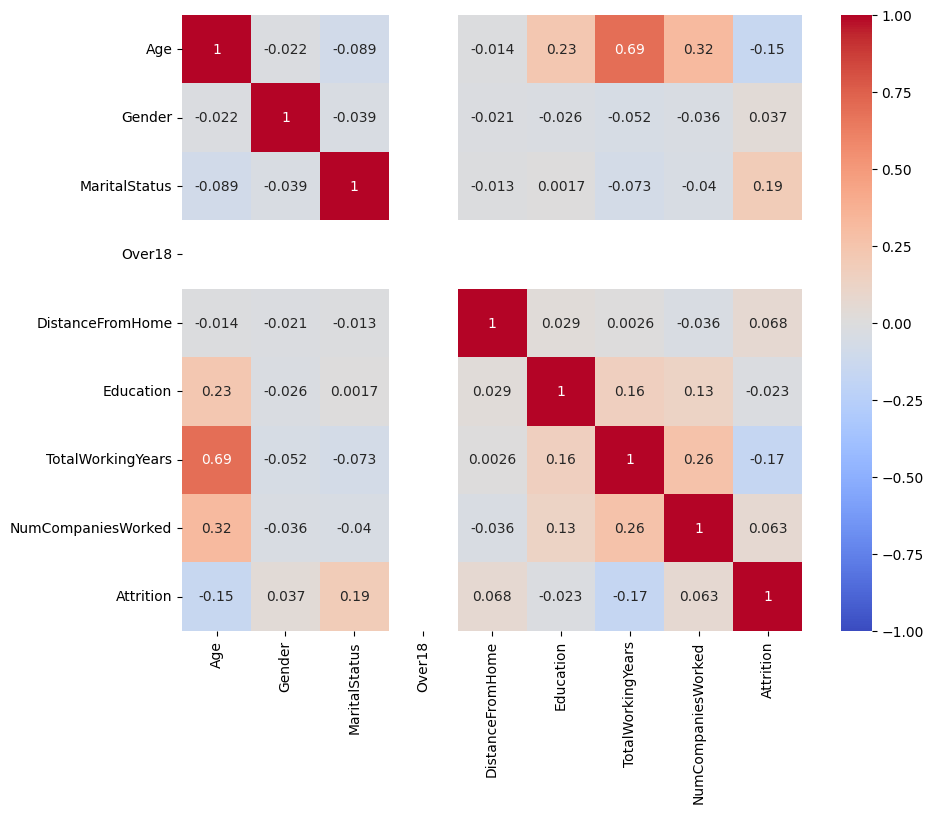

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_train_le[features_info_employee + ['Attrition']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title(f'Heatmap Tương Q {features_info_employee}')
plt.show()

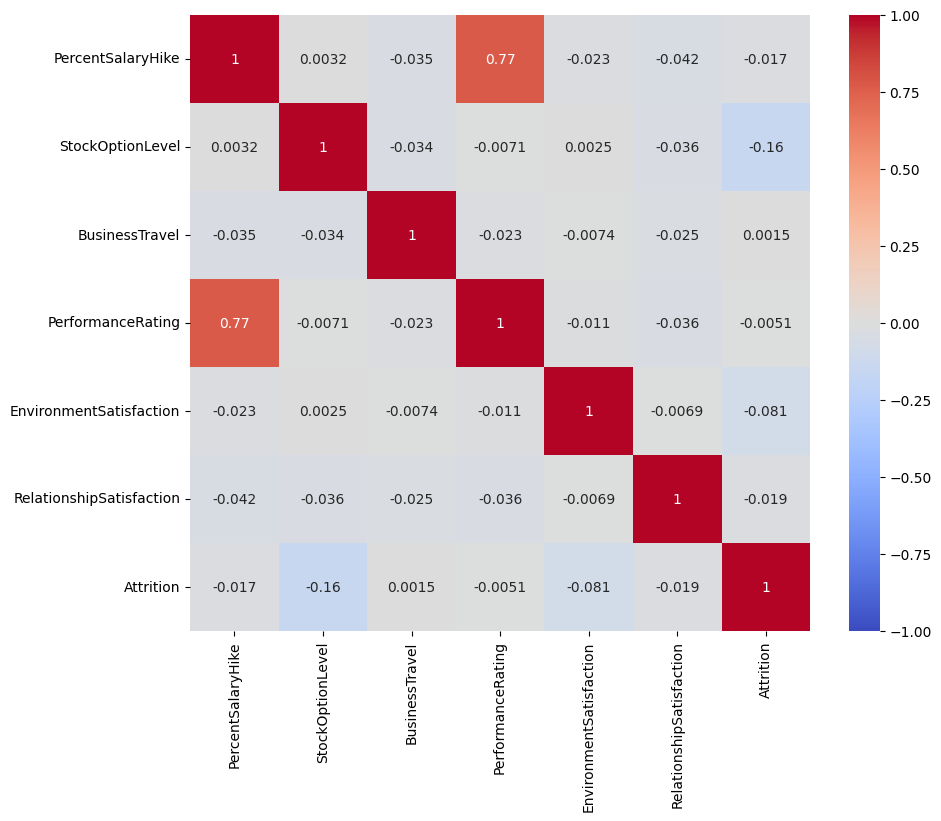

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_train_le[features_info_company + ['Attrition']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title(f'Heatmap Tương Q {feature_info_company}')
plt.show()

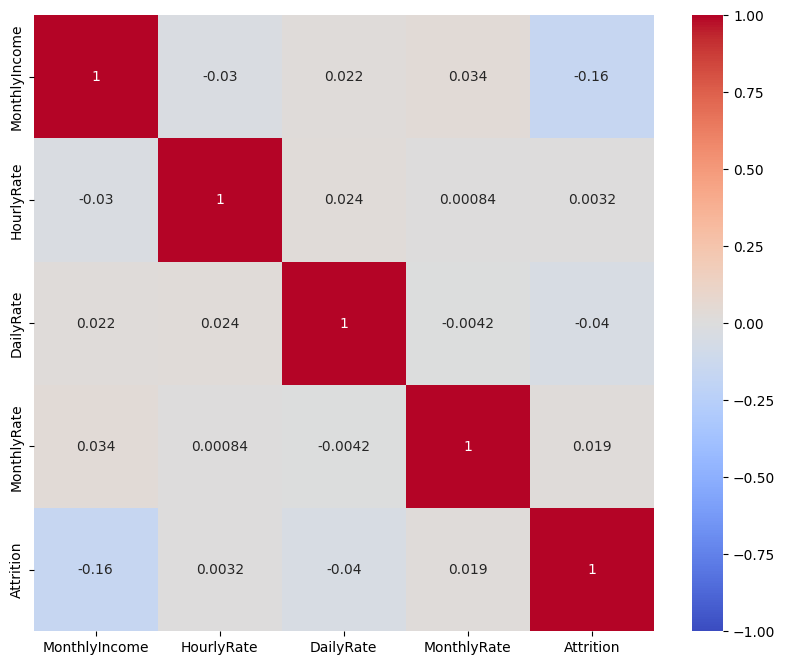

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_train_le[features_salary + ['Attrition']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title(f'Heatmap Tương Q {feature_info_company}')
plt.show()

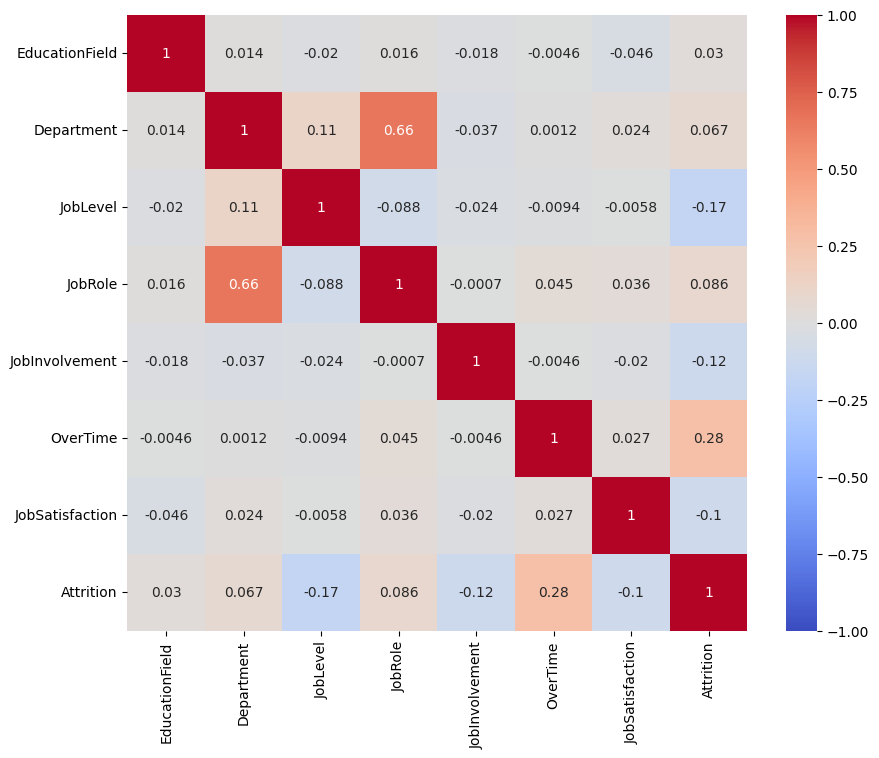

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_train_le[features_info_job + ['Attrition']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title(f'Heatmap Tương Q {feature_info_company}')
plt.show()

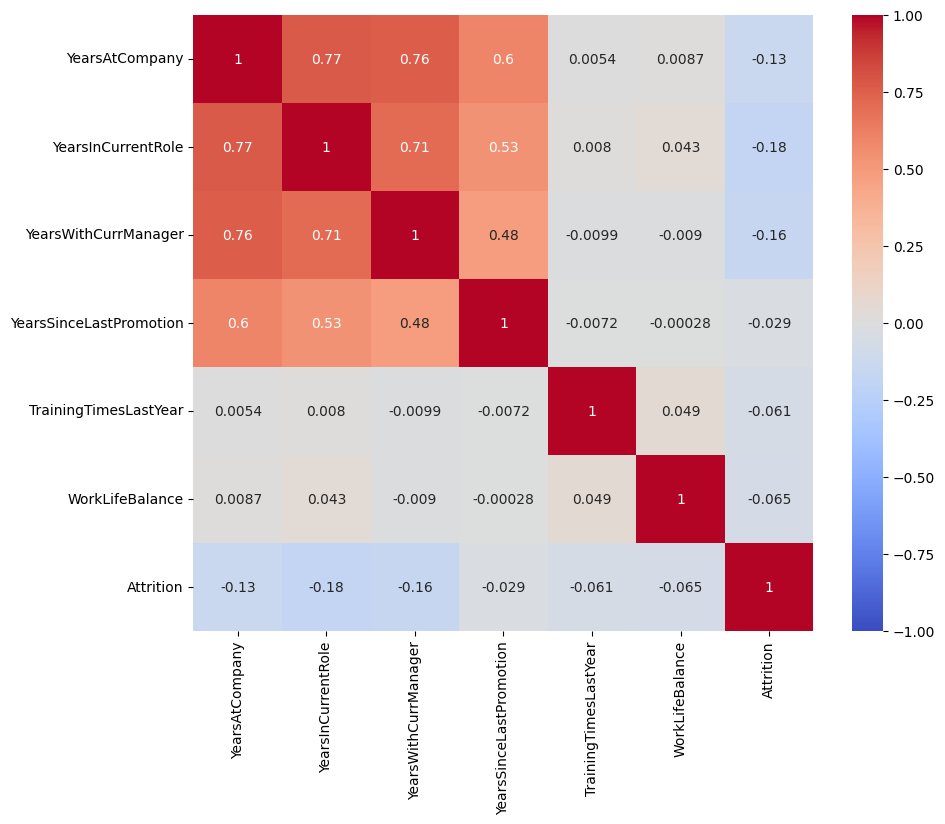

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_train_le[features_info_emp_company + ['Attrition']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title(f'Heatmap Tương Q {feature_info_company}')
plt.show()

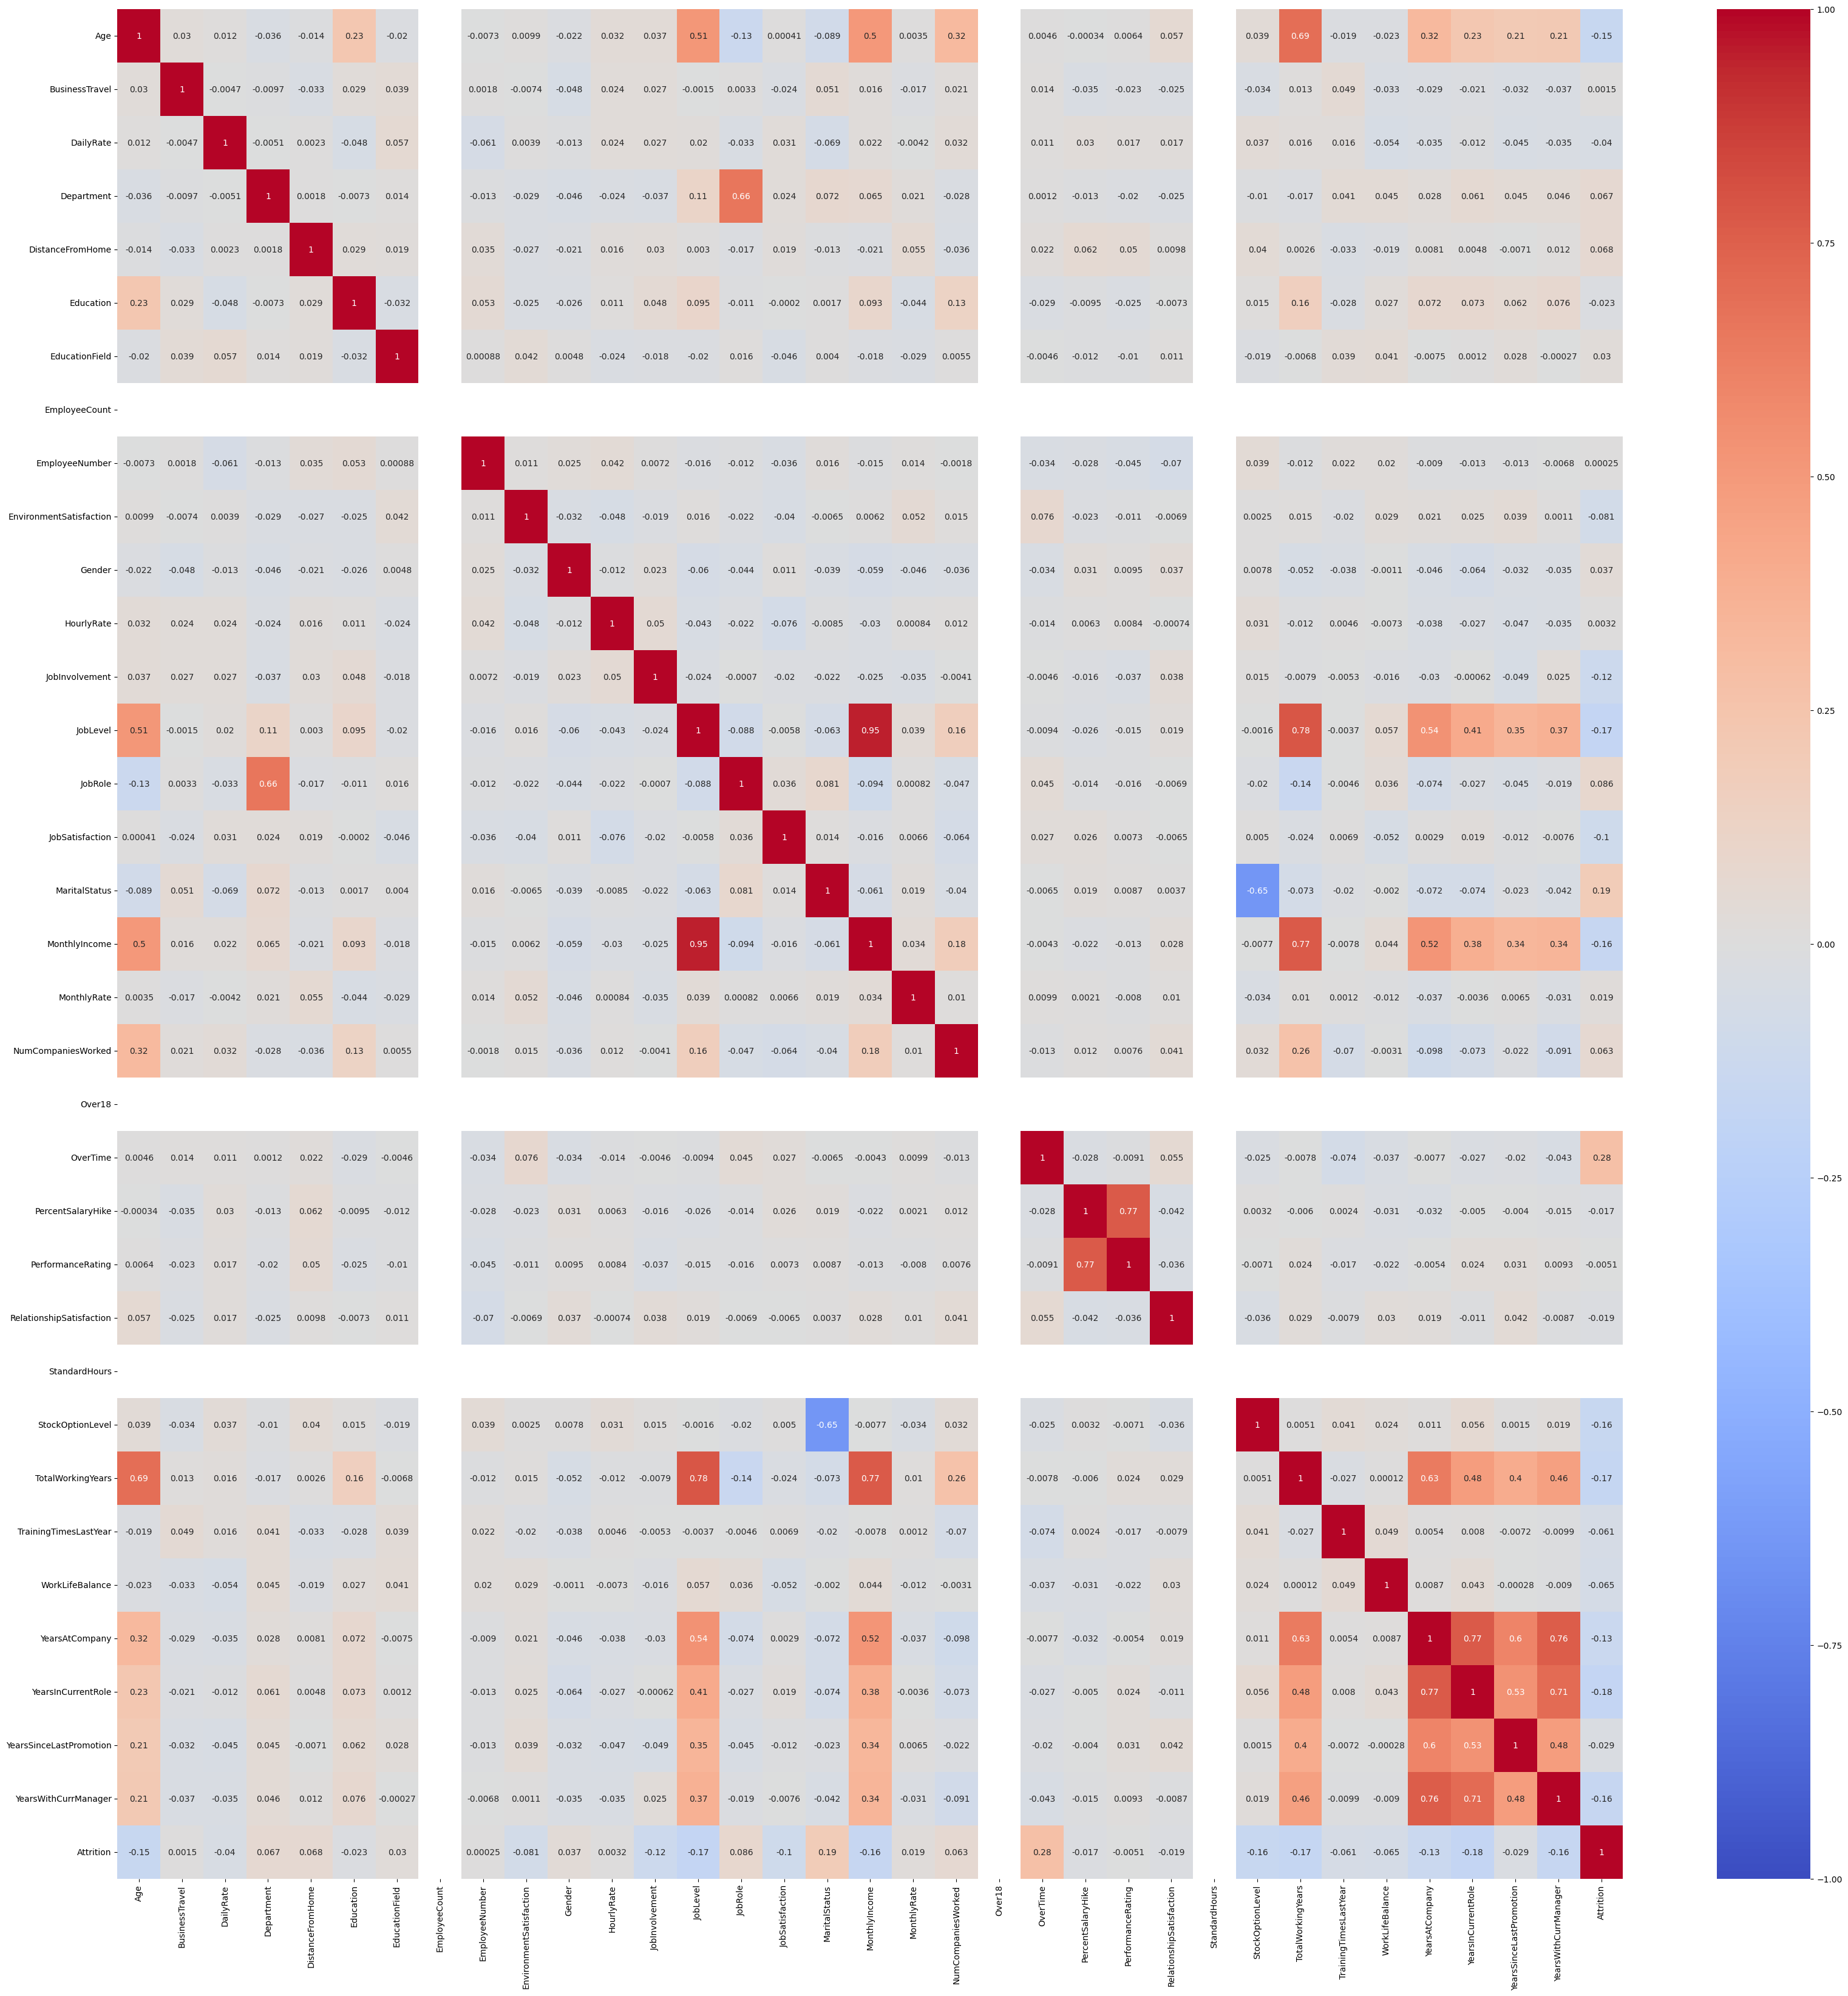

In [ ]:
plt.figure(figsize=(40, 40))
corr_matrix = df_train_le[columns_df].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title(f'Heatmap Tương Q {feature_info_company}')
plt.show()

Qua các biểu đồ tương quan trên ta có thể thấy:
- Thu nhập hàng tháng có tương quan cao với cấp bậc công việc.
- Cấp bậc công việc có tương quan cao với tổng số giờ làm việc.
- Thu nhập hàng tháng có tương quan cao với tổng số giờ làm việc.
- Tuổi cũng có tương quan tích cực với tổng số giờ làm việc.
- Tình trạng hôn nhân và cấp độ quyền chọn cổ phiếu có tương quan tiêu cực.